# Matching our Flux Estimate to Literature

## Objective

We have made our method of estimating the neutron flux clear in the notes under the section/directory `2-Flux/`. Our aim here is to use this flux--ostensibly that which is present in the ladder lab in SNOLAB--and scale it so that it represents the flux inside the shielded environments of various published results of dark matter searches in the literature. One key to this note is the comparison of our isotropic flux model to the "real" simulated estimates of said results. This will give a cross-check on various assumptions like: a) common flux shape; b) single scatters only; c) surrounding material composition; and d) self-shielding. 

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

In [2]:
# Setup
import os
import numpy as np
import pandas as pd
import ENDF6el as el
import flux_recoil_spec as frs
from statistics import median
from pyteomics import mass
from time import time

#os.chdir('../data_files') #Set working directory to shorten paths
sys.path.append('../data_files/EDW/')
import EDW

In [3]:
#Import Data
f6TR_nu = pd.read_csv('../data_files/SNOLAB/Fig6TR_neutrons.txt',encoding='utf-16',comment="#",header=None)
f7TR_nu = pd.read_csv('../data_files/SNOLAB/Fig7TR_neutrons.txt',comment="#",header=None)

#calculate from our flux
#Flux specific to SNOLAB Si Detectors
Er = np.geomspace(10/1e6,1,100) #recoil energy
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-4)

drde_Si,_ = frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Si',debug=True)

fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=np.float64(-0.3419890601701721), intercept=np.float64(-12.883178144228607), rvalue=np.float64(-0.9953352356165477), pvalue=np.float64(2.8473572672910784e-06), stderr=np.float64(0.014824519476612421), intercept_stderr=np.float64(0.06273875262265481))
0.009995281867072022 0.01
/Users/villaa/Research/n-elec-scattering/saved_data/dRdEr-SNOLAB.h5


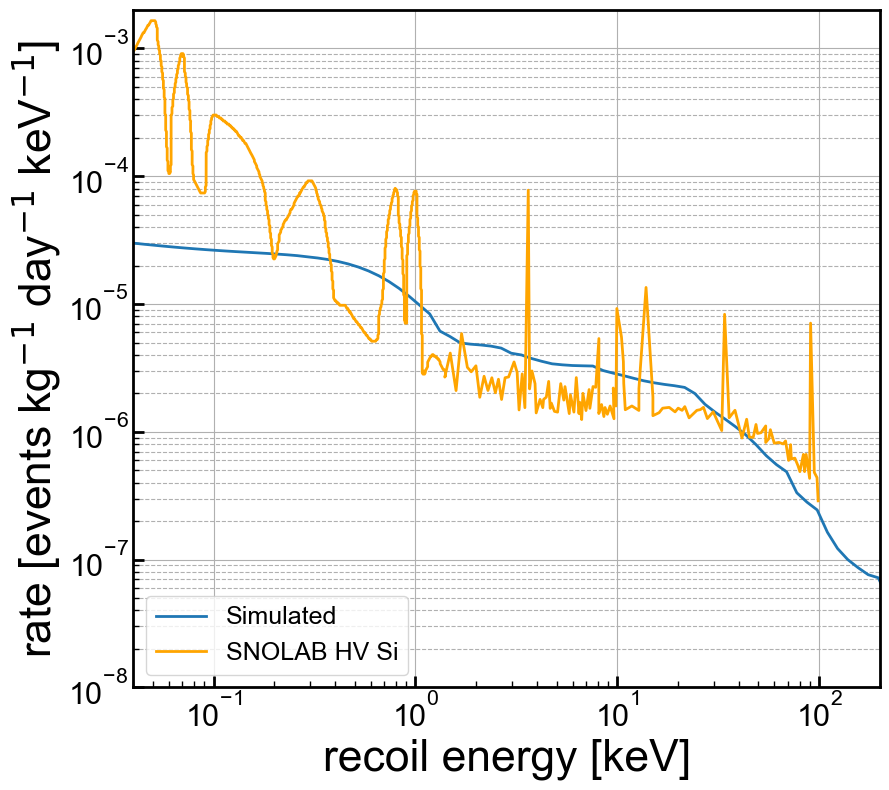

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--')
#plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',color='k',s=0.1)

scdms_si_factor=5e-6

ax1.plot(Er*1000,scdms_si_factor*drde_Si[:,0],label='Simulated')
ax1.plot(f7TR_nu[0], f7TR_nu[1]/365,color='orange',linestyle='-',label="SNOLAB HV Si",linewidth=2)


ymin = 1e-8
ymax = 2e-3

#shade in 1-sigma uncertainty bands
#ax1.fill_between(th232chainEn,th_range[0]*jac*th232chainRn/width,th_range[1]*jac*th232chainRn/width, \
#                 facecolor='y',alpha=0.5,label='')
#ax1.fill_between(uchainEn,u_range[0]*jac*uchainRn/width,u_range[1]*jac*uchainRn/width, \
#                 facecolor='r',alpha=0.3,label='')
#ax1.fill_between(sumEn,jac*sumUp/width,jac*sumDn/width, \
#                 facecolor='k',alpha=0.3,label='1$\sigma$ (x10)')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.04, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Si_recoil_spec_compare.png')
plt.show()

In [5]:
#Ge data
f7BR_nu = pd.read_csv('../data_files/SNOLAB/Fig7BR_neutrons.txt',comment="#",header=None)
f3_beta = pd.read_csv('../data_files/EDW/Fig3_Betas.txt',encoding='utf-16',comment="#",header=None)

In [6]:
drde_Ge,_ = frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Ge',debug=True)

/Users/villaa/Research/n-elec-scattering/saved_data/dRdEr-SNOLAB.h5


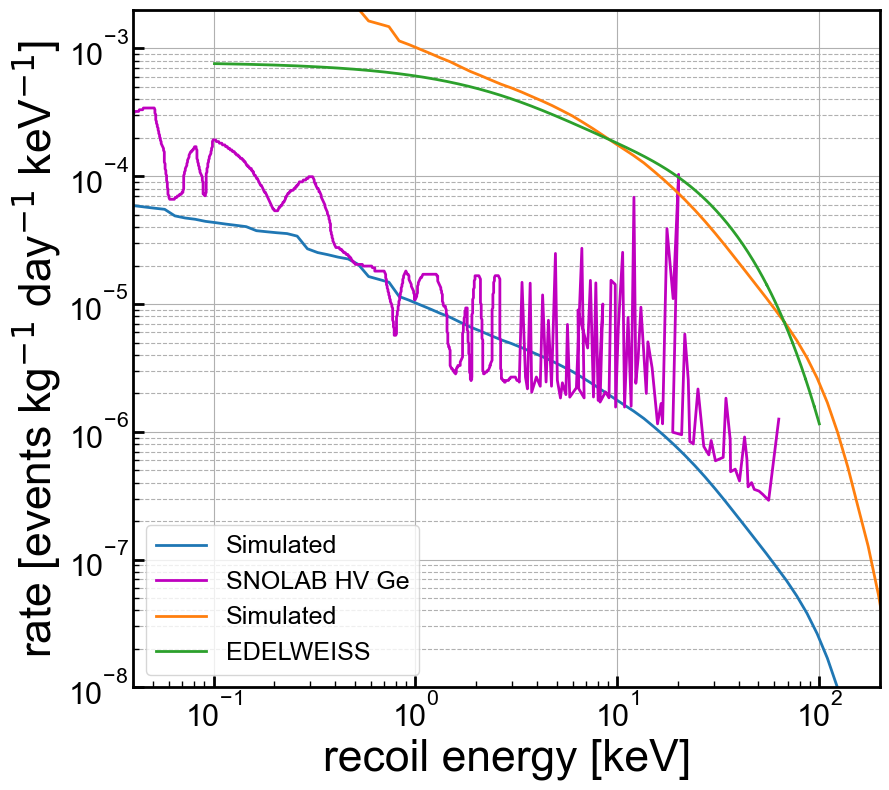

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--')
#plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',color='k',s=0.1)

scdms_ge_factor=5e-6
edw_ge_factor=5e-4

ax1.plot(Er*1000,scdms_ge_factor*drde_Ge[:,0],label='Simulated')
ax1.plot(f7BR_nu[0], f7BR_nu[1]/365,color='m',linestyle='-',label="SNOLAB HV Ge",linewidth=2)
ax1.plot(Er*1000,edw_ge_factor*drde_Ge[:,0],label='Simulated')
plt.plot(f3_beta[0],EDW.neutrons(f3_beta[0]),label='EDELWEISS')


ymin = 1e-8
ymax = 2e-3

#shade in 1-sigma uncertainty bands
#ax1.fill_between(th232chainEn,th_range[0]*jac*th232chainRn/width,th_range[1]*jac*th232chainRn/width, \
#                 facecolor='y',alpha=0.5,label='')
#ax1.fill_between(uchainEn,u_range[0]*jac*uchainRn/width,u_range[1]*jac*uchainRn/width, \
#                 facecolor='r',alpha=0.3,label='')
#ax1.fill_between(sumEn,jac*sumUp/width,jac*sumDn/width, \
#                 facecolor='k',alpha=0.3,label='1$\sigma$ (x10)')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.04, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Ge_recoil_spec_compare.png')
plt.show()

In [8]:
import h5py

f = h5py.File('/Users/villaa/Research/n-elec-scattering/saved_data/dRdEr-SNOLAB.h5','r')
for i in f['Si']['0.0']:
    print(i)

En
Er
F
iso
isodict


In [9]:
Er_read = np.asarray(f['Si/0.0/'+'Er'])
En_read = np.asarray(f['Si/0.0/'+'En'])

print(np.shape(Er_read))
print(Er_read)

print(np.shape(En_read))
print(En_read)

print(np.shape(Er))
print(Er)

print(np.shape(E))
print(E)

(100,)
[1.00000000e-05 1.12332403e-05 1.26185688e-05 1.41747416e-05
 1.59228279e-05 1.78864953e-05 2.00923300e-05 2.25701972e-05
 2.53536449e-05 2.84803587e-05 3.19926714e-05 3.59381366e-05
 4.03701726e-05 4.53487851e-05 5.09413801e-05 5.72236766e-05
 6.42807312e-05 7.22080902e-05 8.11130831e-05 9.11162756e-05
 1.02353102e-04 1.14975700e-04 1.29154967e-04 1.45082878e-04
 1.62975083e-04 1.83073828e-04 2.05651231e-04 2.31012970e-04
 2.59502421e-04 2.91505306e-04 3.27454916e-04 3.67837977e-04
 4.13201240e-04 4.64158883e-04 5.21400829e-04 5.85702082e-04
 6.57933225e-04 7.39072203e-04 8.30217568e-04 9.32603347e-04
 1.04761575e-03 1.17681195e-03 1.32194115e-03 1.48496826e-03
 1.66810054e-03 1.87381742e-03 2.10490414e-03 2.36448941e-03
 2.65608778e-03 2.98364724e-03 3.35160265e-03 3.76493581e-03
 4.22924287e-03 4.75081016e-03 5.33669923e-03 5.99484250e-03
 6.73415066e-03 7.56463328e-03 8.49753436e-03 9.54548457e-03
 1.07226722e-02 1.20450354e-02 1.35304777e-02 1.51991108e-02
 1.70735265e-02 1

In [10]:
Er = np.geomspace(10/1e6,1,100) #recoil energy
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-4)

drde_Si,_ = frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Si',debug=True)

fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=np.float64(-0.3419890601701721), intercept=np.float64(-12.883178144228607), rvalue=np.float64(-0.9953352356165477), pvalue=np.float64(2.8473572672910784e-06), stderr=np.float64(0.014824519476612421), intercept_stderr=np.float64(0.06273875262265481))
0.009995281867072022 0.01
/Users/villaa/Research/n-elec-scattering/saved_data/dRdEr-SNOLAB.h5


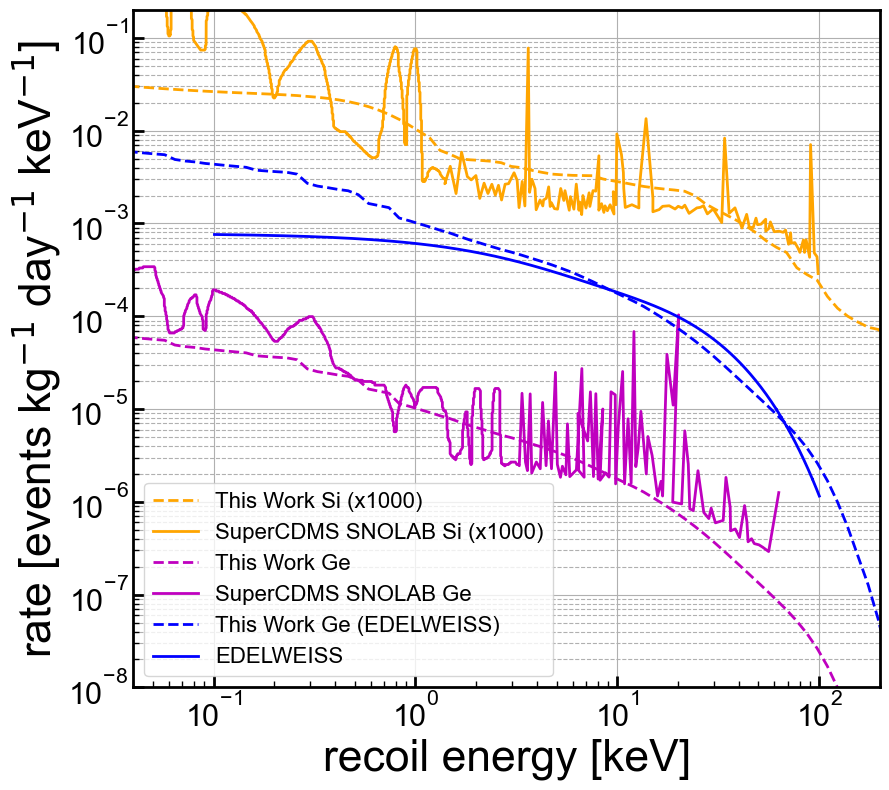

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--')
#plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',color='k',s=0.1)

scdms_ge_factor=5e-6
edw_ge_factor=5e-4

ax1.plot(Er*1000,1000*scdms_si_factor*drde_Si[:,0],color='orange',linestyle="--",label='This Work Si (x1000)')
ax1.plot(f7TR_nu[0], 1000*f7TR_nu[1]/365,color='orange',linestyle='-',label="SuperCDMS SNOLAB Si (x1000)",linewidth=2)
ax1.plot(Er*1000,scdms_ge_factor*drde_Ge[:,0],color='m',linestyle='--',label='This Work Ge')
ax1.plot(f7BR_nu[0], f7BR_nu[1]/365,color='m',linestyle='-',label="SuperCDMS SNOLAB Ge",linewidth=2)
ax1.plot(Er*1000,edw_ge_factor*drde_Ge[:,0],color='b',linestyle='--',label='This Work Ge (EDELWEISS)')
ax1.plot(f3_beta[0],EDW.neutrons(f3_beta[0]),color='b',label='EDELWEISS')


ymin = 1e-8
ymax = 2e-1

#shade in 1-sigma uncertainty bands
#ax1.fill_between(th232chainEn,th_range[0]*jac*th232chainRn/width,th_range[1]*jac*th232chainRn/width, \
#                 facecolor='y',alpha=0.5,label='')
#ax1.fill_between(uchainEn,u_range[0]*jac*uchainRn/width,u_range[1]*jac*uchainRn/width, \
#                 facecolor='r',alpha=0.3,label='')
#ax1.fill_between(sumEn,jac*sumUp/width,jac*sumDn/width, \
#                 facecolor='k',alpha=0.3,label='1$\sigma$ (x10)')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.04, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':16})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SiGe_recoil_spec_compare.png')
plt.show()

In [12]:
from scipy import signal

#Need to split the array because we want to do different smoothing funcs
cutoff=0.3
ffle = ff[ff<=cutoff]; fflespec = ffspec[ff<=cutoff]
ffhe = ff[ff>cutoff]; ffhespec = ffspec[ff>cutoff]
#etot = np.concatenate((ffle,ffhe)) #I think I can just keep using ff here?

#Now apply smoothing
fflespec_smooth = signal.savgol_filter(fflespec,75,3)
ffhespec_smooth = signal.savgol_filter(ffhespec,2001,3)
etotspec = np.zeros((np.size(ff),),dtype=np.float64)
etotspec[ff<=cutoff] = fflespec_smooth
etotspec[ff>cutoff] = ffhespec_smooth

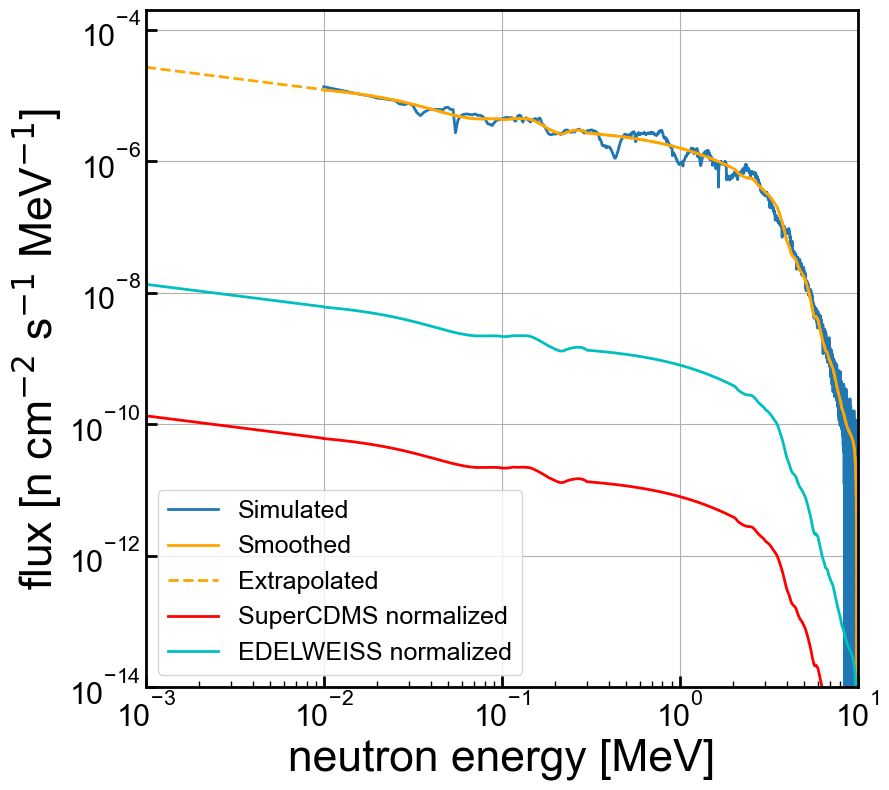

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--')
#plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',color='k',s=0.1)

scdms_si_factor=5e-6

ax1.plot(ff,ffspec,label='Simulated')
ax1.plot(ff,etotspec,label='Smoothed',color='orange')
ax1.plot(E,F,label='Extrapolated',linestyle='--',color='orange')
ax1.plot(E,scdms_si_factor*F,label='SuperCDMS normalized',linestyle='-',color='r')
ax1.plot(E,edw_ge_factor*F,label='EDELWEISS normalized',linestyle='-',color='c')
#ax1.plot(f7TR_nu[0], f7TR_nu[1]/365,color='orange',linestyle='-',label="SNOLAB HV Si",linewidth=2)


ymin = 1e-14
ymax = 2e-4

#shade in 1-sigma uncertainty bands
#ax1.fill_between(th232chainEn,th_range[0]*jac*th232chainRn/width,th_range[1]*jac*th232chainRn/width, \
#                 facecolor='y',alpha=0.5,label='')
#ax1.fill_between(uchainEn,u_range[0]*jac*uchainRn/width,u_range[1]*jac*uchainRn/width, \
#                 facecolor='r',alpha=0.3,label='')
#ax1.fill_between(sumEn,jac*sumUp/width,jac*sumDn/width, \
#                 facecolor='k',alpha=0.3,label='1$\sigma$ (x10)')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(1e-3, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Flux_compare.png')
plt.show()

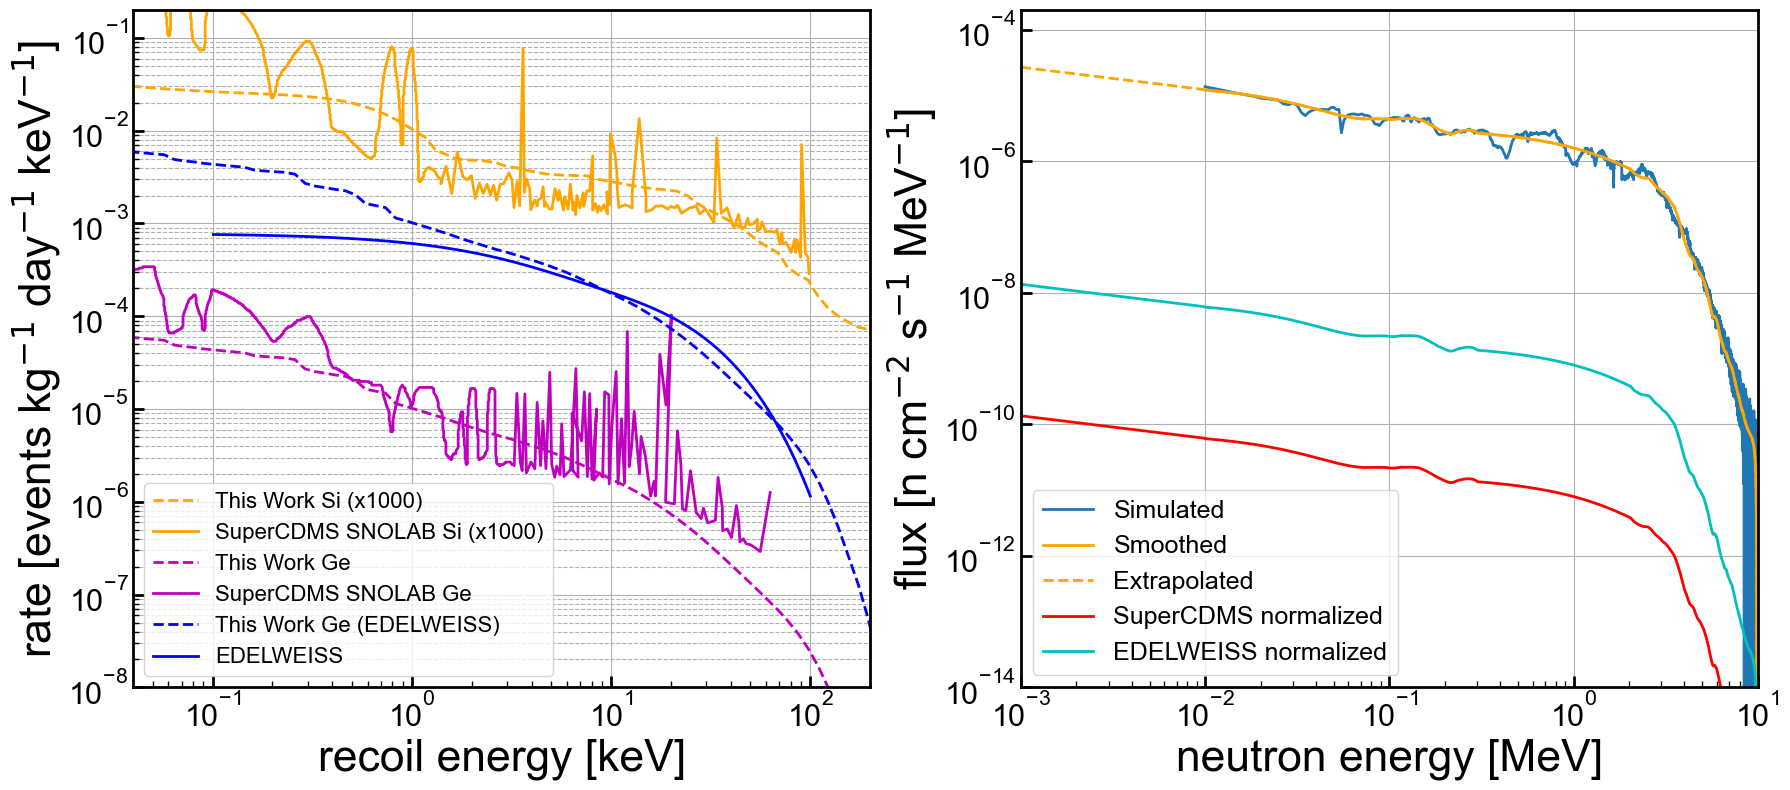

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(nrows = 1, ncols = 2,figsize=(18.0,8.0))
ax1 = axes[0]
ax2 = axes[1]

#plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--')
#plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',color='k',s=0.1)

scdms_ge_factor=5e-6
edw_ge_factor=5e-4

ax1.plot(Er*1000,1000*scdms_si_factor*drde_Si[:,0],color='orange',linestyle="--",label='This Work Si (x1000)')
ax1.plot(f7TR_nu[0], 1000*f7TR_nu[1]/365,color='orange',linestyle='-',label="SuperCDMS SNOLAB Si (x1000)",linewidth=2)
ax1.plot(Er*1000,scdms_ge_factor*drde_Ge[:,0],color='m',linestyle='--',label='This Work Ge')
ax1.plot(f7BR_nu[0], f7BR_nu[1]/365,color='m',linestyle='-',label="SuperCDMS SNOLAB Ge",linewidth=2)
ax1.plot(Er*1000,edw_ge_factor*drde_Ge[:,0],color='b',linestyle='--',label='This Work Ge (EDELWEISS)')
ax1.plot(f3_beta[0],EDW.neutrons(f3_beta[0]),color='b',label='EDELWEISS')


ymin = 1e-8
ymax = 2e-1

#shade in 1-sigma uncertainty bands
#ax1.fill_between(th232chainEn,th_range[0]*jac*th232chainRn/width,th_range[1]*jac*th232chainRn/width, \
#                 facecolor='y',alpha=0.5,label='')
#ax1.fill_between(uchainEn,u_range[0]*jac*uchainRn/width,u_range[1]*jac*uchainRn/width, \
#                 facecolor='r',alpha=0.3,label='')
#ax1.fill_between(sumEn,jac*sumUp/width,jac*sumDn/width, \
#                 facecolor='k',alpha=0.3,label='1$\sigma$ (x10)')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.04, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':16})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

ax2.plot(ff,ffspec,label='Simulated')
ax2.plot(ff,etotspec,label='Smoothed',color='orange')
ax2.plot(E,F,label='Extrapolated',linestyle='--',color='orange')
ax2.plot(E,scdms_si_factor*F,label='SuperCDMS normalized',linestyle='-',color='r')
ax2.plot(E,edw_ge_factor*F,label='EDELWEISS normalized',linestyle='-',color='c')
#ax1.plot(f7TR_nu[0], f7TR_nu[1]/365,color='orange',linestyle='-',label="SNOLAB HV Si",linewidth=2)

ymin = 1e-14
ymax = 2e-4

#ax1.set_yscale('linear')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(1e-3, 10) 
ax2.set_ylim(ymin,ymax)
ax2.set_xlabel(r'neutron energy [MeV]')
ax2.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')
ax2.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/recoil_and_flux.png')
plt.show()